## Alex Felipe Barbosa - 17/07/2025
### Data Science Academy 
### Projetos de Analise de Dados com Linguagem Python

### Projeto 2 - Técnicas de Pré-Processamento para Analise de Dados

Pacotes Python utilizados no Projeto

In [1]:
!pip install -q -U watermark

In [2]:
!pip install -q missingno

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
%reload_ext watermark
%watermark -a "Alex Felipe Barbosa"

Author: Alex Felipe Barbosa



Carregando os Dados

In [5]:
# Carrega o dataset 
df_dsa = pd.read_csv("dataset.csv")

In [6]:
# Shape
df_dsa.shape

(500, 5)

In [7]:
# Colunas 
df_dsa.columns

Index(['Idade', 'Salario', 'Genero', 'Escolaridade',
       'Score_Exame_Psicotecnico'],
      dtype='object')

In [8]:
# 5 primeiras linhas do dataset 
df_dsa.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
0,58,30404.959339,Masculino,Médio,56.0
1,48,20886.502401,Feminino,Médio,NaN
2,34,15959.388748,Masculino,Médio,57.0
3,62,28534.995327,Outro,Superior,68.0
4,27,10553.176215,Outro,Fundamental,44.0


In [9]:
# Amostra de dados 
df_dsa.sample(10)

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
154,32,5662.789500,Feminino,Médio,50.0
99,36,27380.854196,Feminino,Fundamental,29.0
181,27,10620.908797,Outro,Médio,78.0
418,49,18097.853238,Masculino,Fundamental,47.0
478,35,17325.057548,Feminino,Superior,95.0
171,44,16010.610537,Masculino,Médio,76.0
175,46,24069.899554,Outro,Médio,44.0
103,52,28459.595858,Masculino,Fundamental,56.0
259,21,9484.773070,Masculino,Superior,65.0
79,64,32062.962004,Masculino,Médio,52.0


In [10]:
# Info
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     500 non-null    int64  
 1   Salario                   450 non-null    float64
 2   Genero                    500 non-null    object 
 3   Escolaridade              500 non-null    object 
 4   Score_Exame_Psicotecnico  470 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


## Análise Exploratória dos Dados 
Esta etapa do processo ajuda a compreender como os dados estão organizados e os eventuais problemas.

In [11]:
# Descrevendo os dados não numéricos 
df_dsa.describe(include= object)

,Genero,Escolaridade
count,500,500
unique,3,3
top,Feminino,Médio
freq,169,274


In [12]:
# Descrevendo os dados numéricos 
df_dsa.describe()

,Idade,Salario,Score_Exame_Psicotecnico
count,500.000000,450.000000,470.000000
mean,42.848000,21252.781137,61.565957
std,13.189725,8322.933018,17.662523
min,20.000000,-3254.849042,20.000000
25%,31.750000,15139.019963,48.000000
50%,44.000000,21681.102602,61.000000
75%,54.000000,27379.540314,74.000000
max,65.000000,40845.107626,100.000000


### Visualizando a distribuição das Variáveis Quantitativas 

In [13]:
colunas_selecionadas = [list(df_dsa.columns.values)[i] for i in [0, 1, 4]]

In [14]:
colunas_selecionadas

['Idade', 'Salario', 'Score_Exame_Psicotecnico']

c:\Users\alexf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


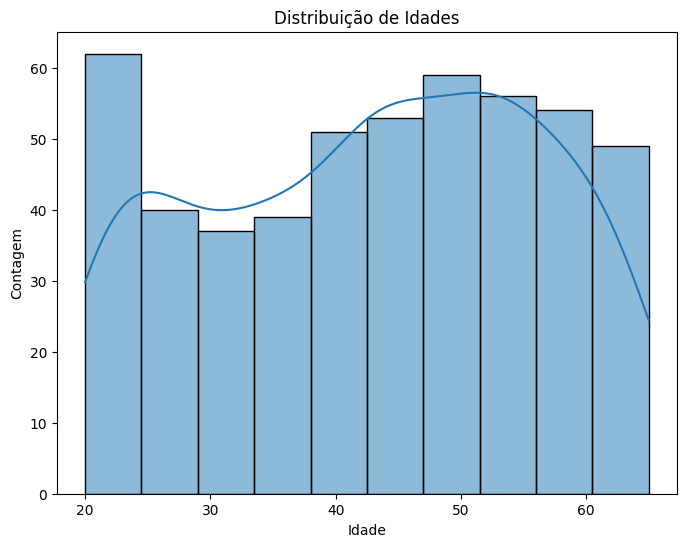

In [15]:
# Distribuição de Idades
plt.figure(figsize=(8,6))
sns.histplot(df_dsa['Idade'], kde=True)
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()


c:\Users\alexf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


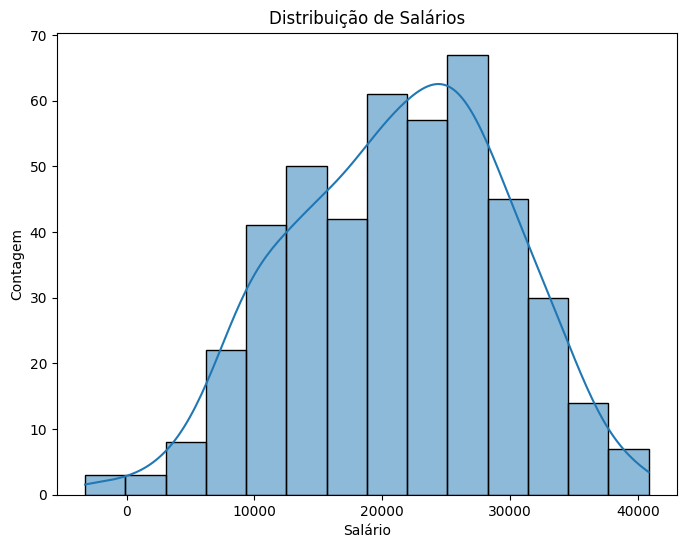

In [16]:
# Distribuição de Salários 
plt.figure(figsize=(8,6))
sns.histplot(df_dsa['Salario'], kde = True)
plt.title('Distribuição de Salários')
plt.xlabel('Salário')
plt.ylabel('Contagem')
plt.show()

c:\Users\alexf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


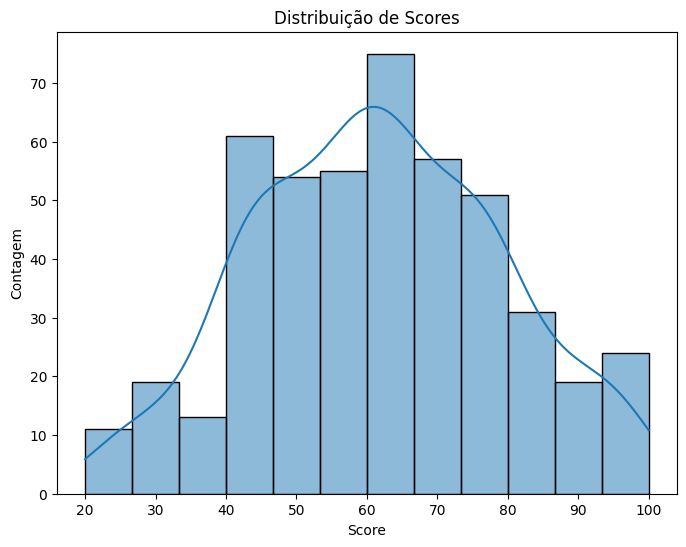

In [17]:
# Distribuição de Scores 
plt.figure(figsize=(8,6))
sns.histplot(df_dsa['Score_Exame_Psicotecnico'], kde= True)
plt.title('Distribuição de Scores')
plt.xlabel('Score')
plt.ylabel('Contagem')
plt.show()

### Visualizando a distribuição das Variáveis Qualitativas 

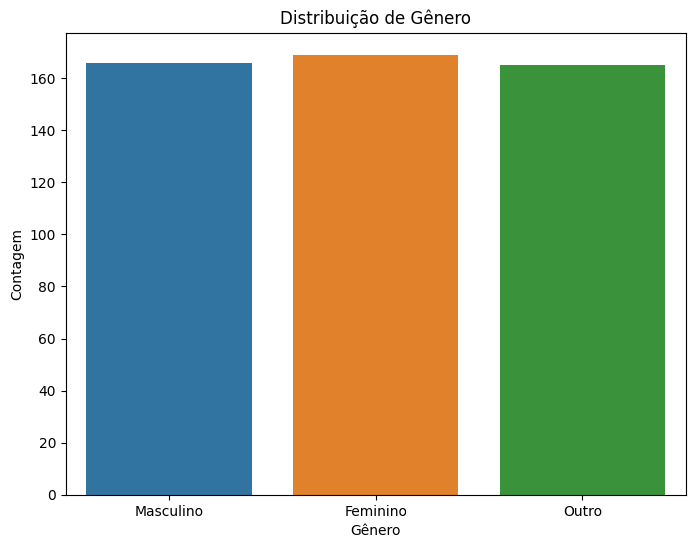

In [18]:
# Distribuição de Gênero
plt.figure(figsize=(8,6))
sns.countplot(data= df_dsa, x= 'Genero')
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

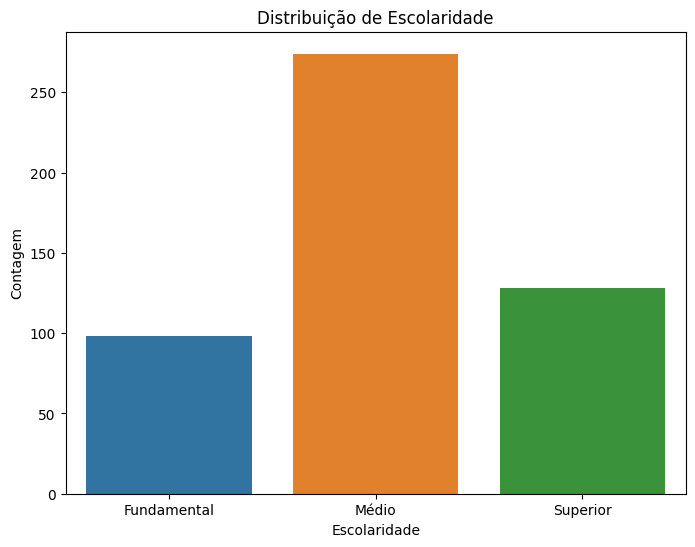

In [19]:
# Distribuição de Escolaridade 
plt.figure(figsize= (8,6))
sns.countplot(data= df_dsa, x= 'Escolaridade', order= ['Fundamental', 'Médio', 'Superior'])
plt.title('Distribuição de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Contagem')
plt.show()

### Correlação entre variáveis numéricas 

A correlação entre variáveis numéricas quantitativas nos permite entender como uma variavel se move em relação à outra. O método mais comum para calcular a correção entre as variáveis é usando coeficiente de correlação de Pearson, que varia entre -1 e 1.


- Quanto mais próximo de 1, mais forte é a correlação positiva.
- Quanto mais próximo de -1, mais forte é a correlação negativa.
- Próximo de 0 indica pouca ou nenhuma correlação.

Vamos calcular a matriz de correlação e depois visualiza-la em um mapa de calor:

In [20]:
# Calculando a matriz de correlação apenas para as variáveis quantitativas 
correlation_matrix = df_dsa[['Idade', 'Salario', 'Score_Exame_Psicotecnico']].corr()

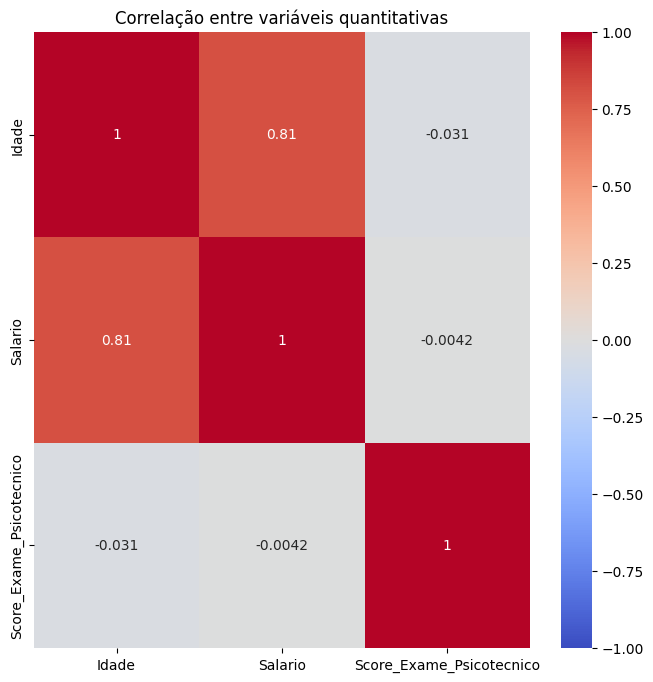

In [21]:
# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(8,8));
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm', vmin= -1, vmax= 1)
plt.title('Correlação entre variáveis quantitativas')
plt.show()

### Associação entre variáveis Qualitativas 

Para variáveis categóricas usamos associação (e não correlação) para analisar a relação entre as variáveis. Vejamos algumas técnicas de associação.

__Tabela de Contigência:__ é basicamente uma tabela cruzada (crosstab) que mostra a frequencia (ou contagem) de observações em cada categoria para duas variaveis.

In [22]:
# Tabela de Contigência
tabela_contigencia = pd.crosstab(df_dsa['Genero'], df_dsa['Escolaridade'])

In [23]:
print(tabela_contigencia)

Escolaridade  Fundamental  Médio  Superior
Genero                                    
Feminino               31     90        48
Masculino              32     95        39
Outro                  35     89        41


__Teste do Qui-Quadrado:__ É usado para testar a independência entre duas variáveis categóricas.

O Teste do Qui-Quadrado é uma tecnica estatistica que é usada para determinar se há uma associação significativa entre duas variaveis categóricas em conjunto de dados. Existem várias hipóteses associadas ao teste do qui-quadrado:

_Hipótese Nula (H0):_ A hipótese nula afirma que não há associação significativa entre as duas variaveis categóricas no conjunto de dados. Em outras palavras, as duas variaveis são independentes uma da outra.

_Hipóste Alternativa (H1 ou Ha):_ A hipótese alternativa é a negação da hipótese nula. Ela sugere que há uma associação significativa entre as duas variaveis categóricas no conjunto de dados. Em termos simples, as duas variáveis não são independentes.

Aplicamos o teste e analisamos o valor-p. Se o valor-p for menor que um nivel de significância (geralmente 0.05), podemos rejeitar a hipótese nula de que as variaveis são independentes.

In [24]:
# Carrega a função chi2_contigency
from scipy.stats import chi2_contingency

In [25]:
# Aplica a função chi2_contigency
chi2, p, _, _ = chi2_contingency(tabela_contigencia)

In [26]:
print(f"Valor-p do teste Qui-quadrado: {p:.4f}")

Valor-p do teste Qui-quadrado: 0.8300


Neste caso falhamos em rejeitar a H0. Provavelmente as duas variáveis são independentes uma da outra.

__Coeficiente de Contigência de Cramér (V):__ Mede a força da associação entre duas variaveis nominais. Seu valor varia de 0 (sem associação) a 1 (associação perfeita). É baseado no valor do qui-quadrado.

In [27]:
# Calculando o Coeficiente de Contigência de Cramér
n = tabela_contigencia.sum().sum()
phi2 = chi2 / n
r, k = tabela_contigencia.shape
cramers_v = np.sqrt(phi2 / min(r-1, k-1))
print(f"Coeficiente de Cramér V: {cramers_v:.4f}")

Coeficiente de Cramér V: 0.0385


Provavelmente não há associação entre as variáveis.

### Técnicas de Pré-Processamento de Dados

Até aqui analisamos e exploramos os dados. Usamos o resultado desse trabalho para decidir o tipo de processamento que devemos realizar. 
Começaremos pelo tratamento de valores ausentes, duplicatas e valores negativos.

### Valores Duplicados

In [28]:
# Usamos o método duplicated() para criar uma serie de valores booleanos indicando duplicatas
duplicatas = df_dsa.duplicated()

In [29]:
# Exibe linhas duplicadas 
df_dsa[duplicatas]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


### Valores Negativos

In [30]:
# Verificamos valores negativos na coluna Salario
df_dsa[df_dsa['Salario']< 0 ]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
94,20,-619.478622,Masculino,Médio,58.0
358,21,-2984.433215,Masculino,Médio,43.0
380,20,-3254.849042,Outro,Médio,50.0


    Valores negativos na variável Salário seráo convertidos em valores ausentes e então faremos o tratamento de valores ausentes.

In [31]:
# Substituimos valores negativos por NaN (valores ausentes)
df_dsa['Salario'] = df_dsa['Salario'].apply(lambda x: x if x >= 0 else None)

In [32]:
# Verificamos valores negativos na coluna Salario
df_dsa[df_dsa['Salario']< 0 ]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


### Valores Ausentes

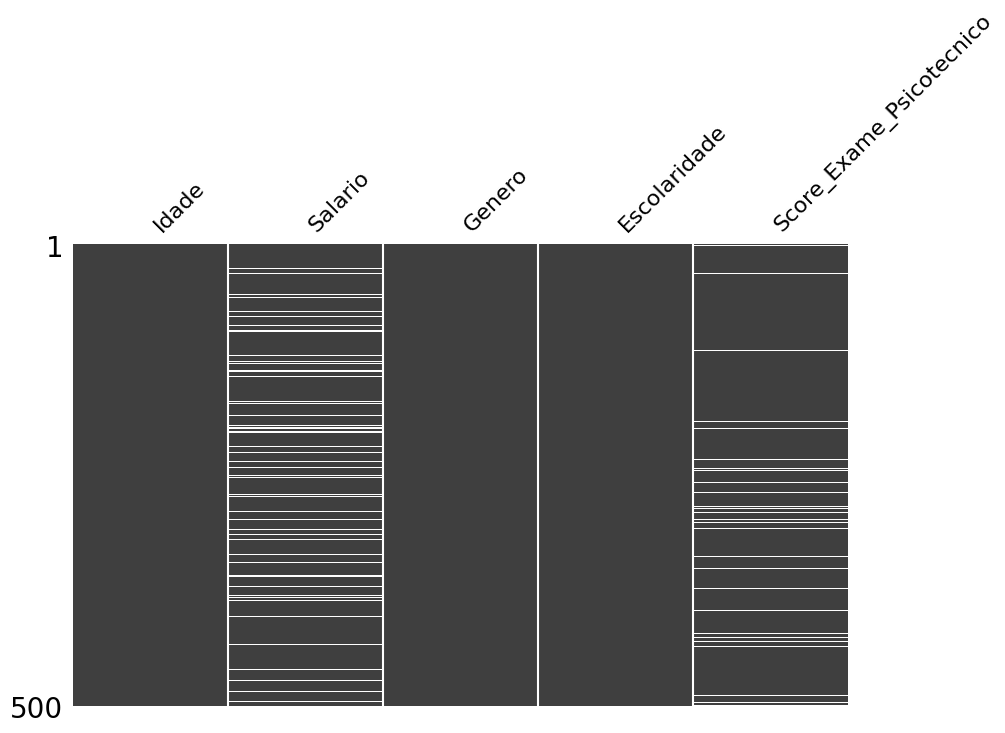

In [33]:
# Mapa de valores ausentes
msno.matrix(df_dsa, figsize= (10,6), sparkline= False)
plt.show()

Neste grafico, a presença de dados é representada por barras escuras e os valores ausentes são representados por espaços em branco. O lado direito do gráfico fornece um grafico de barras que indica a quantidade total ed valores presentes para cada variável.

In [34]:
# Usamos o método isna() para verificar valores ausentes em cada coluna
valores_ausentes = df_dsa.isna().sum()

In [35]:
print(valores_ausentes)

Idade                        0
Salario                     53
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [36]:
# Calcular a porcentagem de valores ausentes em cada coluna
porcentagem_ausentes = (df_dsa.isna().mean() * 100).round(2)

In [37]:
print(porcentagem_ausentes)

Idade                        0.0
Salario                     10.6
Genero                       0.0
Escolaridade                 0.0
Score_Exame_Psicotecnico     6.0
dtype: float64


### Estratégias de Tratamento de Valores Ausentes 

Quando você tem uma variável com valores ausentes, como nesse caso em que a variavel "salário" tem 10% de valores ausentes, existem várias estratégias que você pode considerar para lidar com esses valores ausentes. A escolha da estratégia depende do contexto dos seus dados e do objetivo da analise.
Algumas das estratégias comuns incluem:

__Remoção de linhas:__ Você pode optar por remover as linhas que contém valores ausentes na coluna "Salário". Isso é apropriado se a quantidade de dados faltantes for pequena em relação ao tamanho total do conjunto de dados e se a remoção não introduzir viés nos seus resultados. No entanto, essa estratégia pode levar à perda de informações.

__Preenchimento com valor padrão:__ Dependendo do contexto, você pode optar por preencher os valores ausentes com um valor padrão, como a média, a mediana ou um valor especifico. Isso pode ser apropriado se você acredita que os valores ausentes não são criticos e que um valor padrão não afetará significativamente a análise.

__Preenchimento com base em outras variáveis:__ Às vezes, você pode usar informações de outras variaveis do dataset para preencher os valores ausentes de "salário". Por exemplo, você pode preencher com a média dos salários de pessoas com a mesma escolaridade ou mesmo gênero.

__Modelo de Previsão:__ Se a variavel "salário" for importante e os valores ausentes não puderem ser facilmente preenchidos com médias ou valores padrão, você pode criar um modelo preditivo para estimar os valores ausentes com base em outras variaveis relevantes. Isso é mais complexo, mas pode ser uma abordagem poderosa se você tiver dados suficientes e a variavel "Salário" for fundamental para analise.

### Teste de Normalidade para decidir a Estratégia de Tratamento de Valores Ausentes

Para preencher os valores ausentes com a média devemos verificar se a variavel segue uma distribuição normal. Se a variável seguir uma distribuição normal, podemos usar a média ou a mediana. Caso contrário devemos usar a mediana.

In [38]:
from scipy import stats

# Extraia a coluna "salario" em uma série
salario = df_dsa['Salario']

# Aplique o teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(salario)

# Imprima o resultado do teste
print(f"Estátistica de teste: {stat}")
print(f"Valor-p: {p_valor}")

# Verifique a hipótese nula com base no p-valor
alfa = 0.05 # Nivel de significância
if p_valor > alfa:
  print("Não há evidências para rejeitar a hipótese nula (Os dados parecem seguir uma distribuição normal).")
else:
  print("A hipótese nula é rejeitada (Os dados não seguem uma distribuição normal).")

Estátistica de teste: nan
Valor-p: 1.0
Não há evidências para rejeitar a hipótese nula (Os dados parecem seguir uma distribuição normal).


    Podemos então usar a média e preencher os valores ausentes. Essa técnica é chamada de imputação.

### Imputação para Tratamento de Valores Ausentes

In [39]:
# Calculamos a média da variavel "Salario" (ignorando os valores ausentes)
media_salario = df_dsa['Salario'].mean()

In [40]:
# Preenchemos os valores ausentes em "salario" com a media
df_dsa['Salario'].fillna(media_salario, inplace= True)

In [41]:
# Usamos o método isna() para verificar os valores ausentes em cada coluna
valores_ausentes = df_dsa.isna().sum()
print(valores_ausentes)

Idade                        0
Salario                      0
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [42]:
from scipy import stats

# Extraia a coluna "Score" em uma série 
score_exame = df_dsa['Score_Exame_Psicotecnico']

# Aplique o teste Shapiro-Wilk
stat, p_valor = stats.shapiro(score_exame)

# Imprima o resultado do teste
print(f"Estatistica de teste: {stat}")
print(f"Valor-p: {p_valor}")

# Verifique a hipótese nula com base no p-valor
alfa = 0.05 # Nivel de significância
if p_valor > alfa:
  print("Não há evidências para rejeitar a hipotese nula (os dados parecem seguir uma distribuição normal).")
else:
  print("A hipótese nula é rejeitada (os dados não seguem uma distribuição normal).")

Estatistica de teste: nan
Valor-p: 1.0
Não há evidências para rejeitar a hipotese nula (os dados parecem seguir uma distribuição normal).


    Podemos então usar a média e preencher os valores ausentes. Essa técnica é chamada de imputação.

In [43]:
# Calculamos a média da variavel "Score" (ignorando os valores ausentes)
media_score = df_dsa['Score_Exame_Psicotecnico'].mean()

In [44]:
# Preenchemos os valores ausentes em "Score" com a média
df_dsa['Score_Exame_Psicotecnico'].fillna(media_score, inplace= True)

In [45]:
# Usamos o método isna() para verificar os valores ausentes de cada coluna
valores_ausentes = df_dsa.isna().sum()
print(valores_ausentes)

Idade                       0
Salario                     0
Genero                      0
Escolaridade                0
Score_Exame_Psicotecnico    0
dtype: int64


    Vimos que há correlação entre Idade e Salário. Mas se mudarmos a variavel Idade para Faixa_Etaria, essa relação se confirma ?

### Teste Estátistico de relação entre Variável Quantitativa e Qualitativa

In [46]:
# Definimos as faixas etárias desejadas em ordem crescente
faixas_etarias = [0, 25, 35, 45, 55, float('inf')]

In [47]:
# Definimos os rótulos para as faixas etárias
rotulos_faixas =  [ 'Menos de 25', '25-34', '35-44','45-54','55 ou mais']

In [48]:
# Usamos a função pd.cut() para criar a variável de faixa etária
df_dsa['Faixa_Etaria'] = pd.cut(df_dsa['Idade'], bins = faixas_etarias, labels= rotulos_faixas)

In [49]:
df_dsa.head()

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Faixa_Etaria
0,58,30404.959339,Masculino,Médio,56.000000,55 ou mais
1,48,20886.502401,Feminino,Médio,61.565957,45-54
2,34,15959.388748,Masculino,Médio,57.000000,25-34
3,62,28534.995327,Outro,Superior,68.000000,55 ou mais
4,27,10553.176215,Outro,Fundamental,44.000000,25-34


In [50]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Idade                     500 non-null    int64   
 1   Salario                   500 non-null    float64 
 2   Genero                    500 non-null    object  
 3   Escolaridade              500 non-null    object  
 4   Score_Exame_Psicotecnico  500 non-null    float64 
 5   Faixa_Etaria              500 non-null    category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 20.4+ KB


In [51]:
# Usamos o método drop() para remover a variavel "idade"
df_dsa.drop('Idade', axis= 1, inplace= True)

In [52]:
df_dsa.head()

,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Faixa_Etaria
0,30404.959339,Masculino,Médio,56.000000,55 ou mais
1,20886.502401,Feminino,Médio,61.565957,45-54
2,15959.388748,Masculino,Médio,57.000000,25-34
3,28534.995327,Outro,Superior,68.000000,55 ou mais
4,10553.176215,Outro,Fundamental,44.000000,25-34


In [53]:
# Arredondamos as colunas "Salario" e "Score" para inteiros
df_dsa['Salario'] = df_dsa['Salario'].round().astype(int)
df_dsa['Score_Exame_Psicotecnico'] = df_dsa['Score_Exame_Psicotecnico'].round().astype(int)

In [54]:
df_dsa.head()

,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Faixa_Etaria
0,30405,Masculino,Médio,56,55 ou mais
1,20887,Feminino,Médio,62,45-54
2,15959,Masculino,Médio,57,25-34
3,28535,Outro,Superior,68,55 ou mais
4,10553,Outro,Fundamental,44,25-34


In [55]:
df_dsa.describe()

,Salario,Score_Exame_Psicotecnico
count,500.00000,500.000000
mean,21410.79200,61.592000
std,7679.06567,17.123667
min,642.00000,20.000000
25%,15888.75000,49.000000
50%,21411.00000,62.000000
75%,26729.00000,73.250000
max,40845.00000,100.000000


In [56]:
# Média de salário por faixa etária
media_salario_por_faixa_etaria = df_dsa.groupby('Faixa_Etaria')['Salario'].mean()
media_salario_por_faixa_etaria

C:\Users\alexf\AppData\Local\Temp\ipykernel_15232\4216115612.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_salario_por_faixa_etaria = df_dsa.groupby('Faixa_Etaria')['Salario'].mean()


Faixa_Etaria
Menos de 25    13108.633803
25-34          14945.184783
35-44          20980.654545
45-54          24736.491935
55 ou mais     29364.359223
Name: Salario, dtype: float64

In [57]:
# Mediana de salario por faixa etária 
mediana_salario_por_faixa_etaria = df_dsa.groupby('Faixa_Etaria')['Salario'].median()
mediana_salario_por_faixa_etaria

C:\Users\alexf\AppData\Local\Temp\ipykernel_15232\1918559611.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mediana_salario_por_faixa_etaria = df_dsa.groupby('Faixa_Etaria')['Salario'].median()


Faixa_Etaria
Menos de 25    12433.0
25-34          15387.5
35-44          21411.0
45-54          24283.0
55 ou mais     29345.0
Name: Salario, dtype: float64

c:\Users\alexf\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


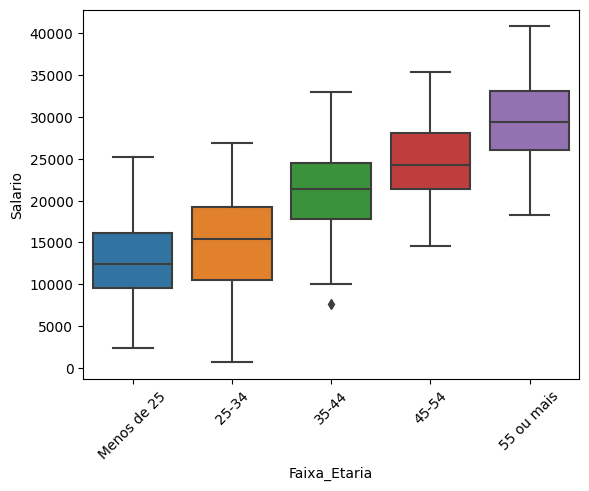

In [58]:
# Boxplots
sns.boxplot(x= 'Faixa_Etaria', y= 'Salario', data= df_dsa)
plt.xticks(rotation = 45)
plt.show()

In [60]:
# Teste ANOVA

# Import 
import scipy.stats as stats

# Realize um teste de ANOVA para verificar as diferenças nas médias
resultado_anova = stats.f_oneway(*[grupo['Salario'] for nome, grupo in df_dsa.groupby('Faixa_Etaria')])
print(resultado_anova)


# Verifique o resultado do teste
if resultado_anova.pvalue < 0.05:
  print("Há evidências de diferenças significativas nas médias de salário entre as faixas etárias.")
else:
  print("Não há evidências de diferenças significativas nas médias de salário entre as faixas etárias.")  


F_onewayResult(statistic=161.2243336211642, pvalue=3.0889235972800835e-88)
Há evidências de diferenças significativas nas médias de salário entre as faixas etárias.


C:\Users\alexf\AppData\Local\Temp\ipykernel_15232\1441057548.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado_anova = stats.f_oneway(*[grupo['Salario'] for nome, grupo in df_dsa.groupby('Faixa_Etaria')])


    Sim, a relação realmente existe entre Idade e Salário

### Relatório Final

Com base em nossa analise observamos que:

- A variavel Salário apresenta valores negativos. Como não temos mais detalhes sobre isso, decidimos converter de valor negativo para valor ausente.
- As variaveis Salario e Score apresentavam problemas de valores ausentes.
- Tratamos os valores ausentes com a imputação da média pois as duas variáveis seguem uma distribuição normal.
- Identificamos que não há relação entre as variáveis gênero e escolaridade, ou seja, elas são independentes.
- Verificamos que há relação entre Idade e Salario, independente do valor individual da idade ou de faixa etária.
- Nossas conclusões e decisões foram baseadas em testes estatisticos.

In [61]:
#%watermark -a "Alex Felipe Barbosa"

In [62]:
#%watermark

In [63]:
#%watermark --iversions

## FIM